In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [39]:
column_names = ['label', 'cap-shape', 'cap-surface', 'cap-color', 
                'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
                'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                'stalk-color-above-ring', 'stalk-color-below-ring', 
                'veil-type', 'veil-color', 'ring-number', 'ring-type', 
                'spore-print-color', 'population', 'habitat']

In [40]:
# Load the .data file and assign headers
df = pd.read_csv('mushroom/agaricus-lepiota.data', header=None, names=column_names)

# Display the data
df.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   label                     8127 non-null   object
 1   cap-shape                 8127 non-null   object
 2   cap-surface               8127 non-null   object
 3   cap-color                 8127 non-null   object
 4   bruises                   8127 non-null   object
 5   odor                      8127 non-null   object
 6   gill-attachment           8127 non-null   object
 7   gill-spacing              8127 non-null   object
 8   gill-size                 8127 non-null   object
 9   gill-color                8127 non-null   object
 10  stalk-shape               8127 non-null   object
 11  stalk-root                8127 non-null   object
 12  stalk-surface-above-ring  8127 non-null   object
 13  stalk-surface-below-ring  8127 non-null   object
 14  stalk-color-above-ring  

In [42]:
df.isnull().sum()

label                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [43]:
df = df.astype(str)
print(type(df['cap-shape'][0]))

<class 'str'>


In [44]:
df.label.value_counts()

label
e    4210
p    3917
Name: count, dtype: int64

In [45]:
df.to_csv('mushroom/mushroom.csv', index=False)

In [46]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print(f"Number of unique values: {df[column].nunique()}")
    if column == 'label':
        print(df.label.value_counts(normalize=True)*100)
    print()

Value counts for column: label
label
e    4210
p    3917
Name: count, dtype: int64
Number of unique values: 2
label
e    51.802633
p    48.197367
Name: proportion, dtype: float64

Value counts for column: cap-shape
cap-shape
x    3657
f    3153
k     829
b     452
s      32
c       4
Name: count, dtype: int64
Number of unique values: 6

Value counts for column: cap-surface
cap-surface
y    3246
s    2557
f    2320
g       4
Name: count, dtype: int64
Number of unique values: 4

Value counts for column: cap-color
cap-color
n    2285
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      46
u      16
r      16
Name: count, dtype: int64
Number of unique values: 10

Value counts for column: bruises
bruises
f    4750
t    3377
Name: count, dtype: int64
Number of unique values: 2

Value counts for column: odor
odor
n    3530
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      37
Name: count, dtype: int64
Number of unique values: 9

Value counts for column:

In [47]:
encoder = LabelEncoder()

for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

    print(f"Column: {column}")
    print("Mapping:")

    mapping = {original: encoded for original, encoded in zip(encoder.classes_, range(len(encoder.classes_)))}
    print(mapping)
    print()

Column: label
Mapping:
{'e': 0, 'p': 1}

Column: cap-shape
Mapping:
{'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}

Column: cap-surface
Mapping:
{'f': 0, 'g': 1, 's': 2, 'y': 3}

Column: cap-color
Mapping:
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}

Column: bruises
Mapping:
{'f': 0, 't': 1}

Column: odor
Mapping:
{'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}

Column: gill-attachment
Mapping:
{'a': 0, 'f': 1}

Column: gill-spacing
Mapping:
{'c': 0, 'w': 1}

Column: gill-size
Mapping:
{'b': 0, 'n': 1}

Column: gill-color
Mapping:
{'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}

Column: stalk-shape
Mapping:
{'e': 0, 't': 1}

Column: stalk-root
Mapping:
{'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}

Column: stalk-surface-above-ring
Mapping:
{'f': 0, 'k': 1, 's': 2, 'y': 3}

Column: stalk-surface-below-ring
Mapping:
{'f': 0, 'k': 1, 's': 2, 'y': 3}

Column: stalk-color-above-ring

In [48]:
df.head()

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


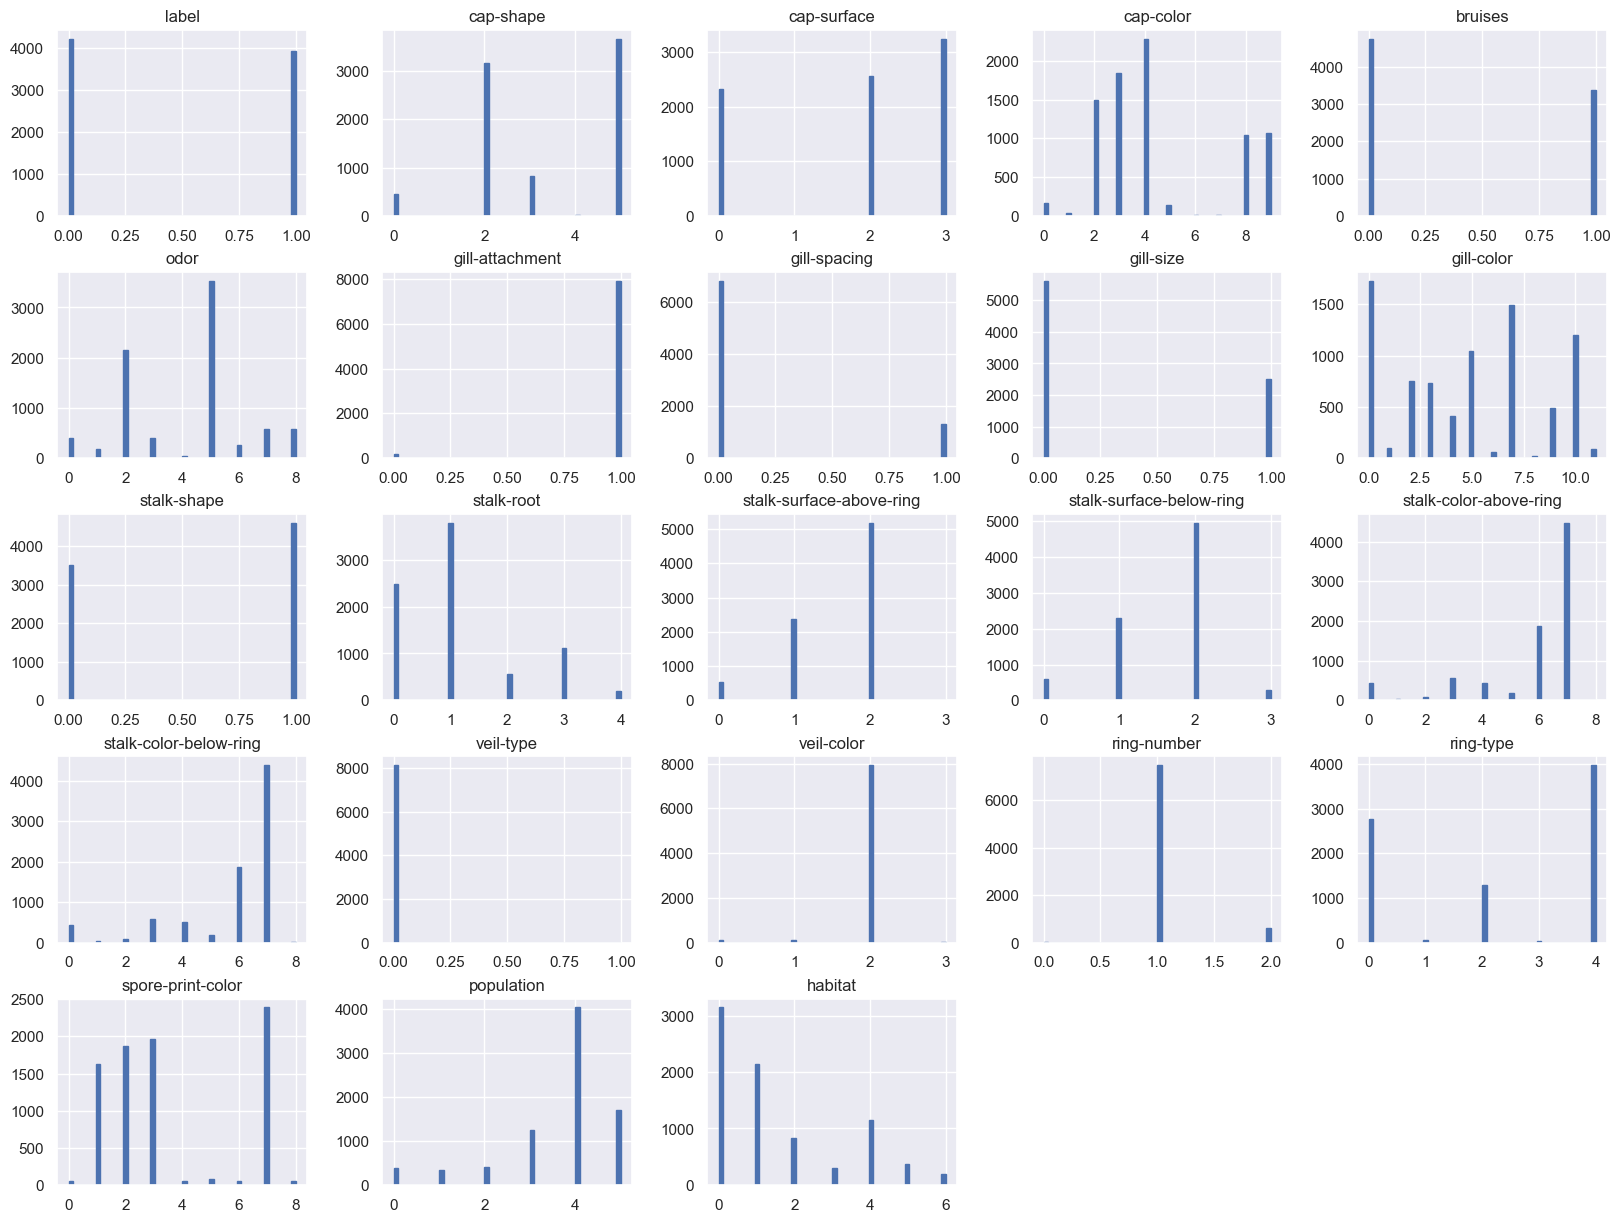

In [49]:
# plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

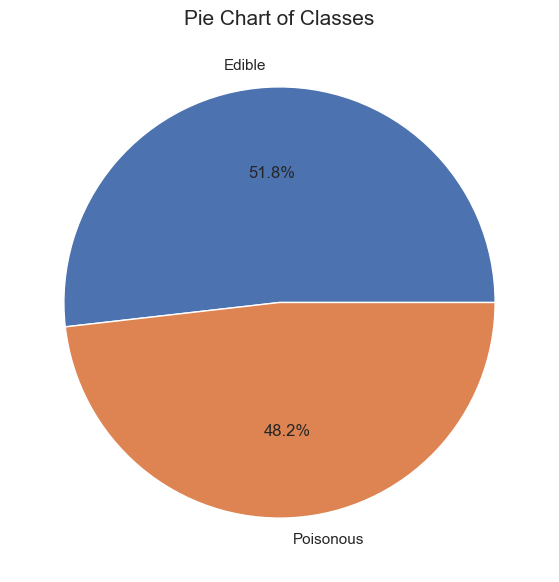

In [50]:
classeslabels = ["Edible", "Poisonous"]
plt.figure(figsize =(12, 7))
plt.pie(df.label.value_counts(normalize=True)*100,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

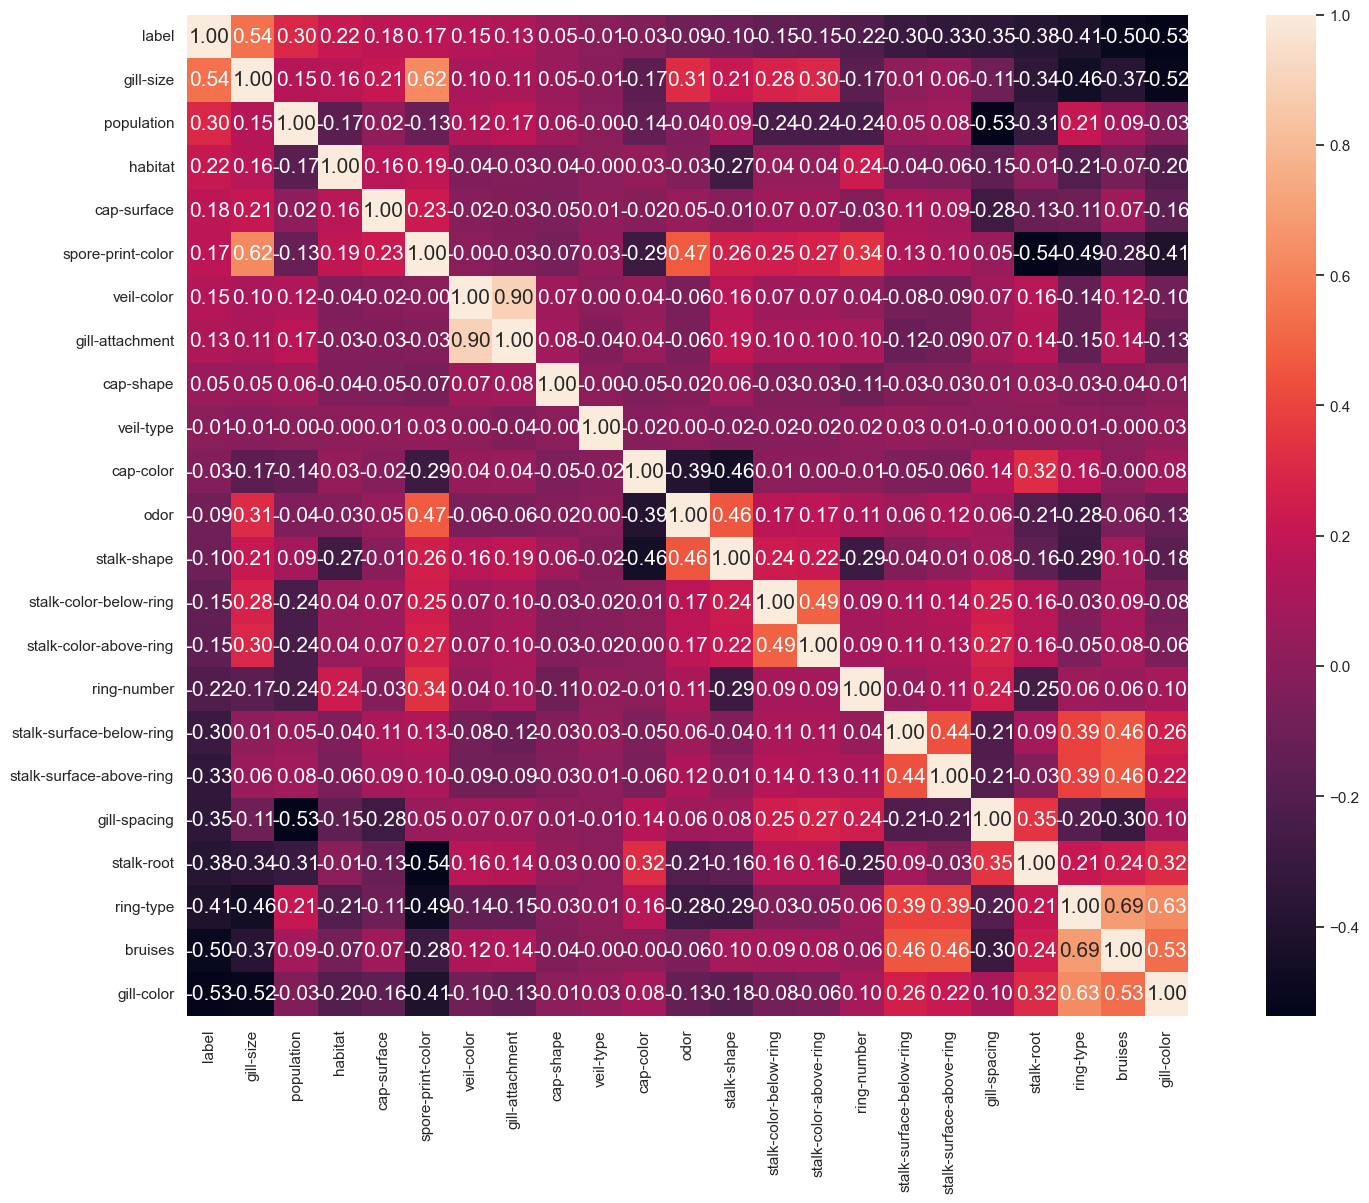

In [51]:
# Correlation chart
corr = df.corr()
k = len(df.columns)
cols = corr.nlargest(k, 'label')['label'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

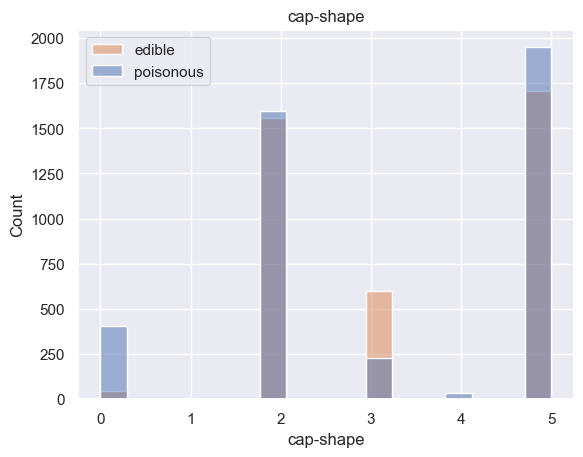

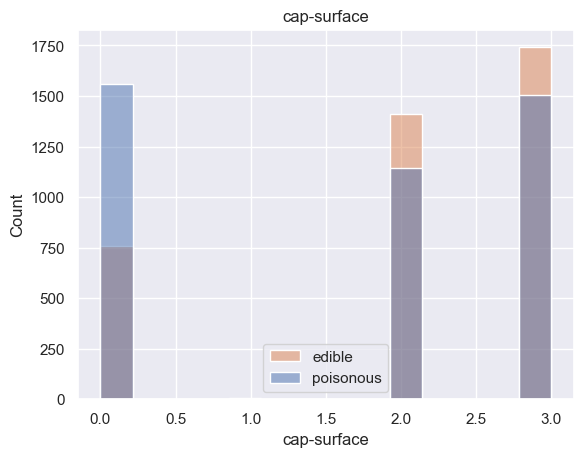

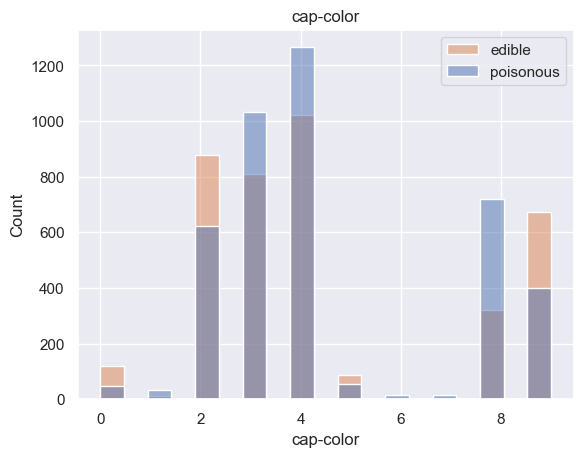

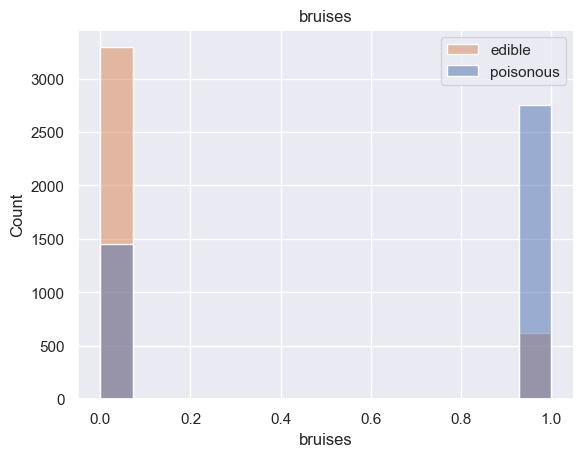

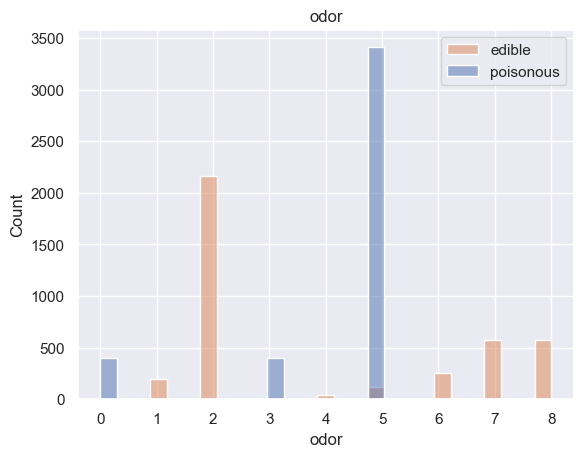

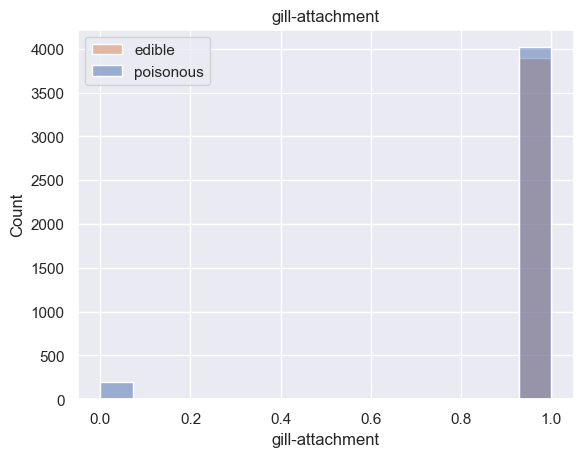

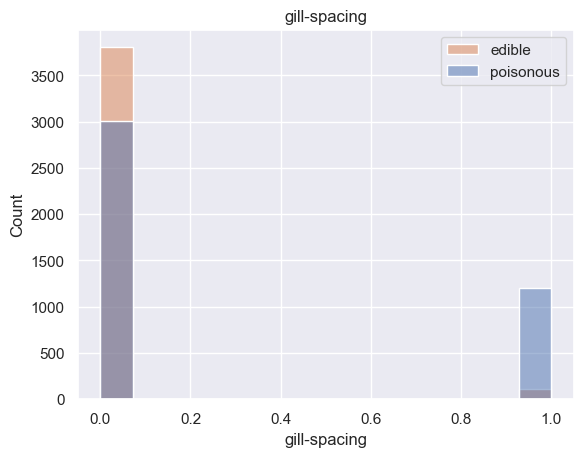

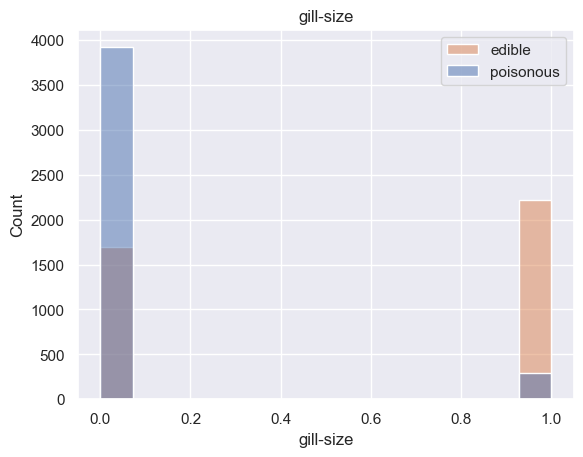

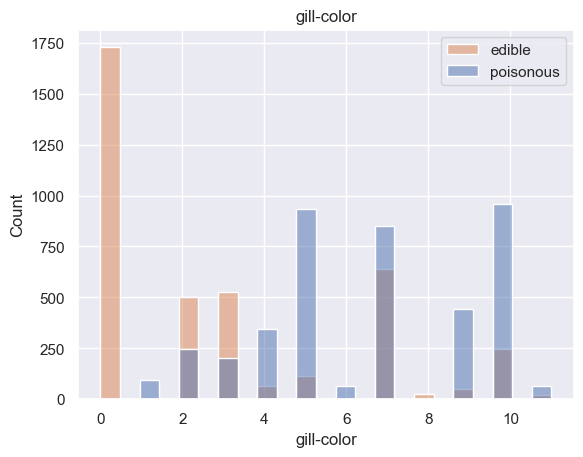

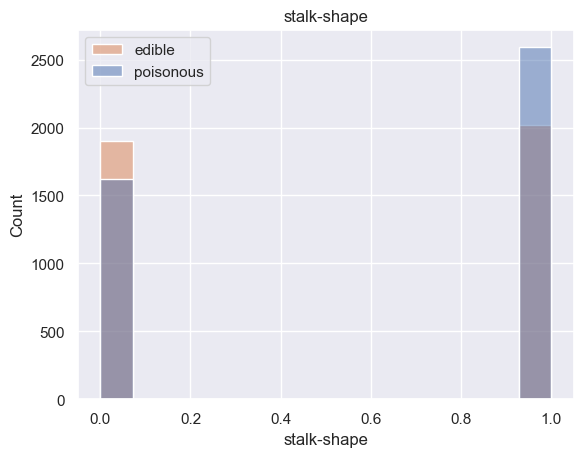

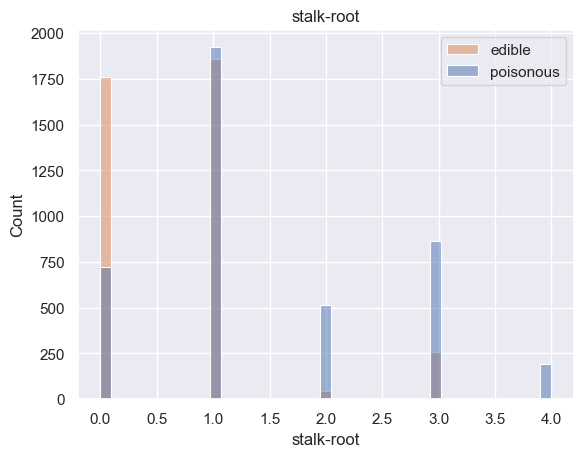

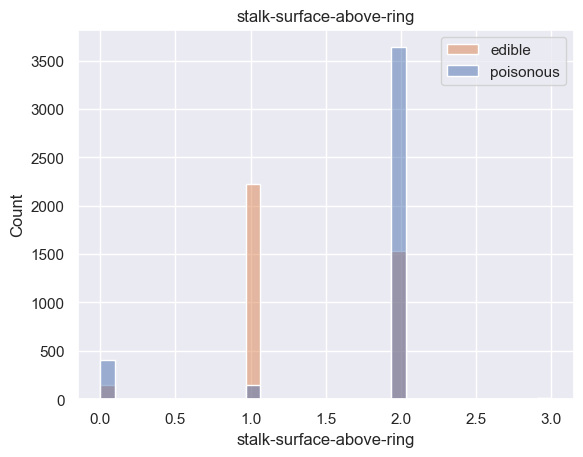

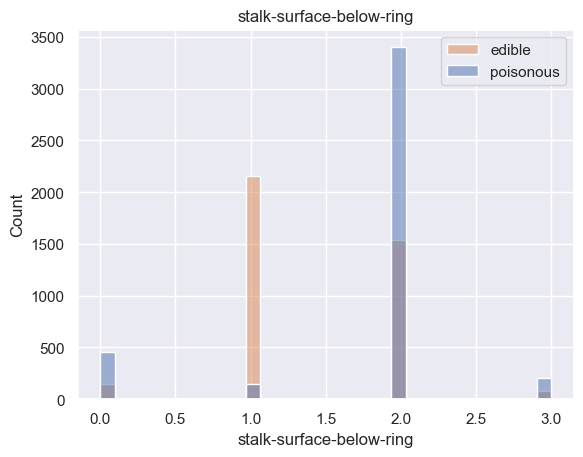

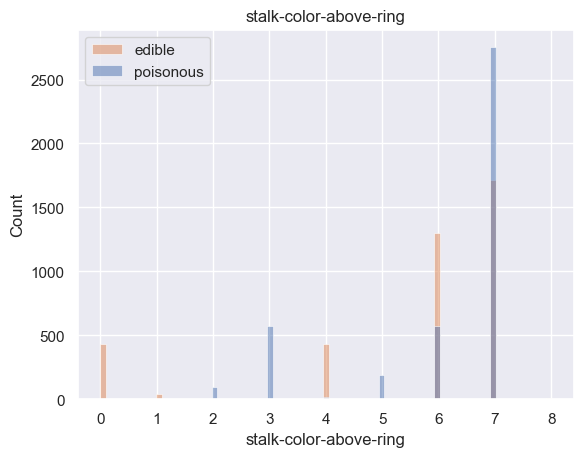

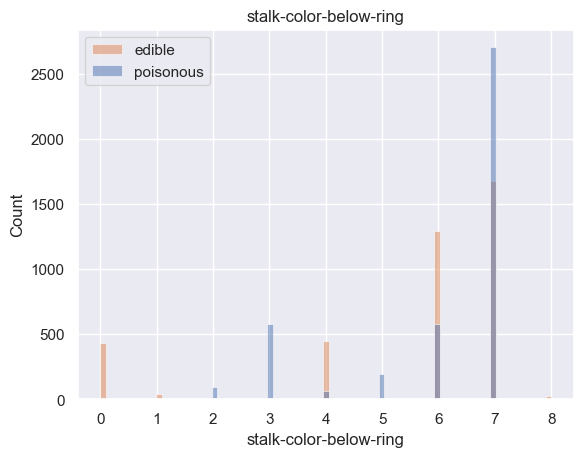

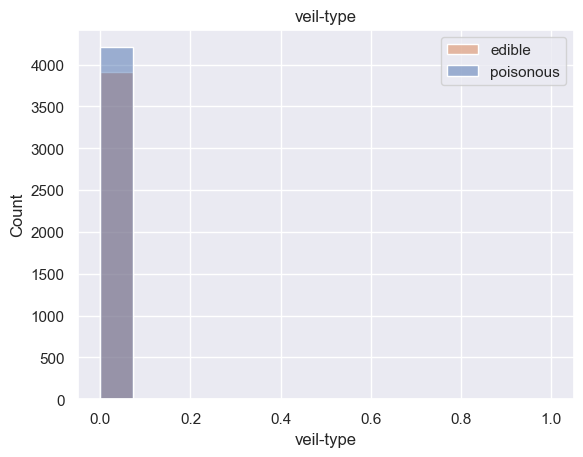

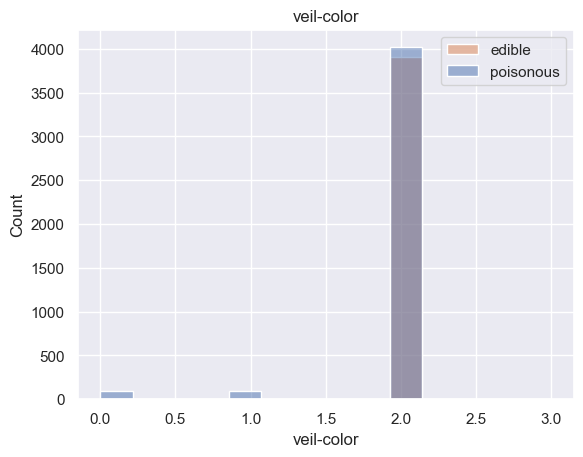

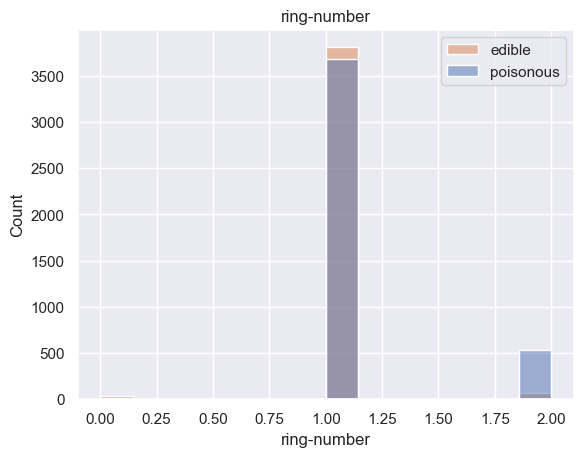

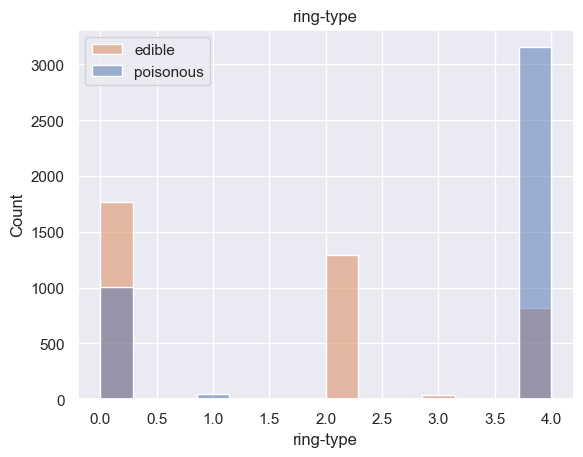

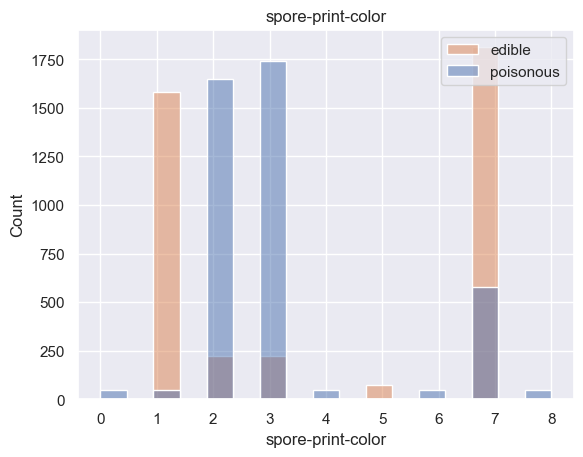

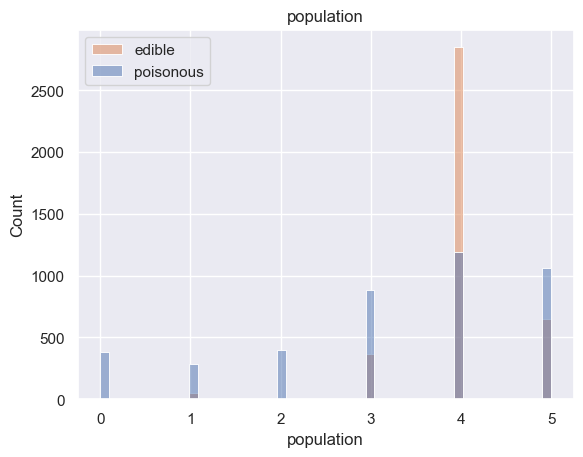

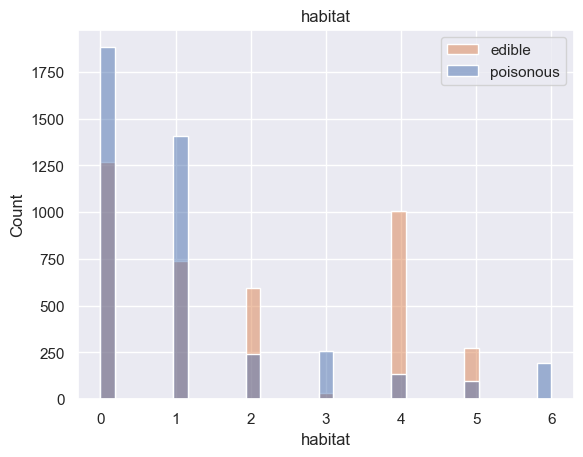

In [52]:
df2 = df.drop(['label'], axis=1)

for feature in df2:
    sns.histplot(data = df,x=feature, hue = 'label')
    plt.legend(labels=['edible','poisonous'])
    plt.title(feature)
    plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),df['label'],test_size=0.20,random_state=0)
X_train.shape, X_test.shape

((6501, 22), (1626, 22))

In [54]:
X_train.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.059176,-0.049109,-0.038513,-0.026751,0.075330,0.015813,0.047823,-0.003310,0.061456,...,-0.035063,-0.040621,-0.032860,NaN,0.068897,-0.103775,-0.023033,-0.079204,0.065278,-0.047707
cap-surface,-0.059176,1.000000,-0.017231,0.081051,0.044068,-0.035928,-0.278788,0.209159,-0.157157,-0.012080,...,0.112699,0.068681,0.073872,NaN,-0.016923,-0.016757,-0.098946,0.233817,0.018759,0.164203
cap-color,-0.049109,-0.017231,1.000000,-0.005572,-0.378304,0.042062,0.144156,-0.167375,0.087191,-0.460443,...,-0.042041,0.003217,0.003837,NaN,0.037988,-0.002073,0.159621,-0.288375,-0.139496,0.034448
bruises,-0.038513,0.081051,-0.005572,1.000000,-0.047149,0.137650,-0.303758,-0.364649,0.531136,0.098973,...,0.459622,0.087489,0.086843,NaN,0.119090,0.057883,0.691133,-0.277356,0.093020,-0.074193
odor,-0.026751,0.044068,-0.378304,-0.047149,1.000000,-0.060574,0.070095,0.302121,-0.121462,0.458678,...,0.067662,0.182937,0.168642,NaN,-0.058382,0.113472,-0.271449,0.464818,-0.049337,-0.022175
gill-attachment,0.075330,-0.035928,0.042062,0.137650,-0.060574,1.000000,0.072709,0.110036,-0.128154,0.187430,...,-0.117540,0.100688,0.100772,NaN,0.896206,0.096088,-0.148195,-0.029484,0.161873,-0.030453
gill-spacing,0.015813,-0.278788,0.144156,-0.303758,0.070095,0.072709,1.000000,-0.112690,0.092528,0.084311,...,-0.211360,0.275702,0.255122,NaN,0.076332,0.239224,-0.202664,0.044470,-0.539416,-0.154772
gill-size,0.047823,0.209159,-0.167375,-0.364649,0.302121,0.110036,-0.112690,1.000000,-0.513485,0.206487,...,0.016942,0.296037,0.277159,NaN,0.105945,-0.173907,-0.451937,0.620654,0.143762,0.163199
gill-color,-0.003310,-0.157157,0.087191,0.531136,-0.121462,-0.128154,0.092528,-0.513485,1.000000,-0.178914,...,0.263884,-0.053759,-0.069443,NaN,-0.094437,0.104726,0.629419,-0.411806,-0.035399,-0.195103
stalk-shape,0.061456,-0.012080,-0.460443,0.098973,0.458678,0.187430,0.084311,0.206487,-0.178914,1.000000,...,-0.036837,0.222308,0.232733,NaN,0.162158,-0.296225,-0.296179,0.260445,0.077502,-0.275246


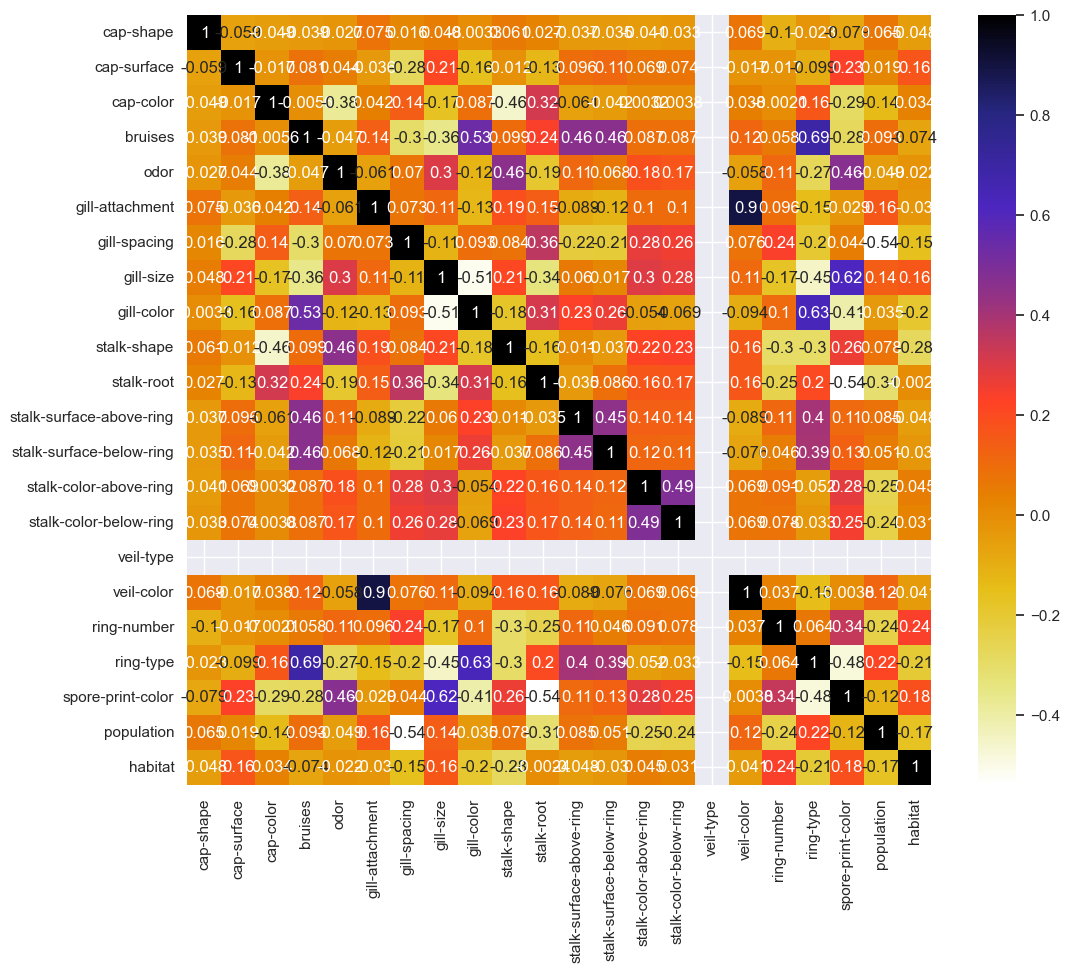

In [55]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [56]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train, 0.7)
print(corr_features)

{'veil-color'}


In [58]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)

In [59]:
# Initialize the Logistic Regression model
LR_model = LogisticRegression(max_iter=1000)  # max_iter is increased if convergence issues occur

# Fit the model to the training data
LR_model.fit(X_train, y_train)

# Predict on the test set
y_pred = LR_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (to show true positives, false positives, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Cross-validation scores (gives a sense of model's performance)
cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Accuracy: 0.9465

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       851
           1       0.95      0.94      0.94       775

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626


Confusion Matrix:
[[812  39]
 [ 48 727]]

Cross-validation scores: [0.933897   0.95153846 0.93846154 0.94692308 0.94769231]
Average cross-validation score: 0.9437


In [60]:
# Initialize the Random Forest model
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest

# Fit the model to the training data
RF_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = RF_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix (to show true positives, false positives, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Optional: Cross-validation scores (gives a sense of model's performance)
cv_scores_rf = cross_val_score(RF_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"\nCross-validation scores: {cv_scores_rf}")
print(f"Average cross-validation score: {cv_scores_rf.mean():.4f}")

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       775

    accuracy                           1.00      1626
   macro avg       1.00      1.00      1.00      1626
weighted avg       1.00      1.00      1.00      1626


Confusion Matrix:
[[851   0]
 [  0 775]]

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0000


In [61]:
# Initialize the Decision Tree model
DT_model = DecisionTreeClassifier(random_state=42)  # You can set additional hyperparameters if needed

# Fit the model to the training data
DT_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = DT_model.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Accuracy: {accuracy_dtree:.4f}")

# Detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

# Confusion Matrix (to show true positives, false positives, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))

# Optional: Cross-validation scores (gives a sense of model's performance)
cv_scores_dtree = cross_val_score(DT_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"\nCross-validation scores: {cv_scores_dtree}")
print(f"Average cross-validation score: {cv_scores_dtree.mean():.4f}")

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       775

    accuracy                           1.00      1626
   macro avg       1.00      1.00      1.00      1626
weighted avg       1.00      1.00      1.00      1626


Confusion Matrix:
[[851   0]
 [  0 775]]

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0000


In [62]:
# Initialize the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Fit the model to the training data
KNN_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = KNN_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

# Detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix (to show true positives, false positives, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Optional: Cross-validation scores (gives a sense of model's performance)
cv_scores_knn = cross_val_score(KNN_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"\nCross-validation scores: {cv_scores_knn}")
print(f"Average cross-validation score: {cv_scores_knn.mean():.4f}")

Accuracy: 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       775

    accuracy                           1.00      1626
   macro avg       1.00      1.00      1.00      1626
weighted avg       1.00      1.00      1.00      1626


Confusion Matrix:
[[849   2]
 [  0 775]]

Cross-validation scores: [0.9961568  0.99923077 0.99692308 0.99923077 0.99846154]
Average cross-validation score: 0.9980


In [63]:
joblib.dump(DT_model, 'mushroom/decision_tree_model.pkl')
joblib.dump(RF_model, 'mushroom/random_forest_model.pkl')
joblib.dump(KNN_model, 'mushroom/knn_model.pkl')
joblib.dump(LR_model, 'mushroom/logistic_regression_model.pkl')

['mushroom/logistic_regression_model.pkl']

In [64]:
# Load your pre-trained models
dtree_model = joblib.load('mushroom/decision_tree_model.pkl')
rf_model = joblib.load('mushroom/random_forest_model.pkl')
knn_model = joblib.load('mushroom/knn_model.pkl')
log_reg_model = joblib.load('mushroom/logistic_regression_model.pkl')

# Function to initialize models
def load_model(model_name):
    if model_name == 'LR':
        return log_reg_model
    elif model_name == 'RF':
        return rf_model
    elif model_name == 'DT':
        return dtree_model
    elif model_name == 'KNN':
        return knn_model
    else:
        raise ValueError("Model name not recognized")
    
    

In [65]:
# Prediction function using the pre-trained model
def predict_with_model(model_name, input_values):
    # Load the selected model
    model = load_model(model_name)
    
    # Predict using the model
    prediction = model.predict([input_values])  # Pass input as a list to predict
    return prediction[0]

In [72]:
# Function to map user input to encoded values and make predictions
def user_input_prediction():
    # Choose model
    print("Choose a model: Logistic Regression(LR), Random Forest(RF), Decision Tree(DT), KNN")
    model_name = input("Enter model name: ")

    # Get user input values in the original form (categorical)
    print("Please enter the values for the following columns:")
    input_values = []
    
    # For example, assuming columns are 'cap-shape', 'cap-surface', 'label', etc.
    columns = ['cap-shape', 'cap-surface', 'cap-color', 
               'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
               'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
               'stalk-surface-above-ring', 'stalk-surface-below-ring', 
               'stalk-color-above-ring', 'stalk-color-below-ring', 
               'veil-type', 'ring-number', 'ring-type', 
               'spore-print-color', 'population', 'habitat']


    legend = {
        "cap-shape": {"b": 0, "c": 1, "f": 2, "k": 3, "s": 4, "x": 5},
        "cap-surface": {"f": 0, "g": 1, "s": 2, "y": 3},
        "cap-color": {"b": 0, "c": 1, "e": 2, "g": 3, "n": 4, "p": 5, "r": 6, "u": 7, "w": 8, "y": 9},
        "bruises": {"f": 0, "t": 1},
        "odor": {"a": 0, "c": 1, "f": 2, "l": 3, "m": 4, "n": 5, "p": 6, "s": 7, "y": 8},
        "gill-attachment": {"a": 0, "f": 1},
        "gill-spacing": {"c": 0, "w": 1},
        "gill-size": {"b": 0, "n": 1},
        "gill-color": {"b": 0, "e": 1, "g": 2, "h": 3, "k": 4, "n": 5, "o": 6, "p": 7, "r": 8, "u": 9, "w": 10, "y": 11},
        "stalk-shape": {"e": 0, "t": 1},
        "stalk-root": {"?": 0, "b": 1, "c": 2, "e": 3, "r": 4},
        "stalk-surface-above-ring": {"f": 0, "k": 1, "s": 2, "y": 3},
        "stalk-surface-below-ring": {"f": 0, "k": 1, "s": 2, "y": 3},
        "stalk-color-above-ring": {"b": 0, "c": 1, "e": 2, "g": 3, "n": 4, "o": 5, "p": 6, "w": 7, "y": 8},
        "stalk-color-below-ring": {"b": 0, "c": 1, "e": 2, "g": 3, "n": 4, "o": 5, "p": 6, "w": 7, "y": 8},
        "veil-type": {"p": 0, "u": 1},
        "ring-number": {"n": 0, "o": 1, "t": 2},
        "ring-type": {"e": 0, "f": 1, "l": 2, "n": 3, "p": 4},
        "spore-print-color": {"b": 0, "h": 1, "k": 2, "n": 3, "o": 4, "r": 5, "u": 6, "w": 7, "y": 8}
    }

    # Print the mappings
    for attribute, mapping in legend.items():
        print(f"# {attribute}")
        for key, value in mapping.items():
            print(f"{key}: {value}", end=", ")
        print("\n")


    for column in columns:
        value = int(input(f"{column}: "))  # Convert input to integer
        input_values.append(value)

    # Make prediction
    prediction = predict_with_model(model_name, input_values)

    # Output prediction
    if prediction == 1:
        print(f"The predicted label for the input values is: Poisonous")
    if prediction == 0:
        print(f"The predicted label for the input values is: Edible")

In [73]:
user_input_prediction()

Choose a model: Logistic Regression(LR), Random Forest(RF), Decision Tree(DT), KNN
Please enter the values for the following columns:
# cap-shape
b: 0, c: 1, f: 2, k: 3, s: 4, x: 5, 

# cap-surface
f: 0, g: 1, s: 2, y: 3, 

# cap-color
b: 0, c: 1, e: 2, g: 3, n: 4, p: 5, r: 6, u: 7, w: 8, y: 9, 

# bruises
f: 0, t: 1, 

# odor
a: 0, c: 1, f: 2, l: 3, m: 4, n: 5, p: 6, s: 7, y: 8, 

# gill-attachment
a: 0, f: 1, 

# gill-spacing
c: 0, w: 1, 

# gill-size
b: 0, n: 1, 

# gill-color
b: 0, e: 1, g: 2, h: 3, k: 4, n: 5, o: 6, p: 7, r: 8, u: 9, w: 10, y: 11, 

# stalk-shape
e: 0, t: 1, 

# stalk-root
?: 0, b: 1, c: 2, e: 3, r: 4, 

# stalk-surface-above-ring
f: 0, k: 1, s: 2, y: 3, 

# stalk-surface-below-ring
f: 0, k: 1, s: 2, y: 3, 

# stalk-color-above-ring
b: 0, c: 1, e: 2, g: 3, n: 4, o: 5, p: 6, w: 7, y: 8, 

# stalk-color-below-ring
b: 0, c: 1, e: 2, g: 3, n: 4, o: 5, p: 6, w: 7, y: 8, 

# veil-type
p: 0, u: 1, 

# ring-number
n: 0, o: 1, t: 2, 

# ring-type
e: 0, f: 1, l: 2, n: 3, p: